### Libraries, paths, and set-up

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import rc
import os

os.chdir('/Users/manotas/Documents/GitHub-Repos/CFForecast_Energy_OptionValuation')
plt.rcParams['text.usetex'] = True

if not os.path.exists('reports/images'):
    os.makedirs('reports/images')

In [2]:
data = pd.read_csv('data/processed/TopRevenueMNC.csv')

# List all the columns for 2023
# List all the columns for 2023
metrics_2023 = [
    'operating_revenue_2023', 'net_income_2023', 'cash_flow_2023',
    'total_assets_2023', 'profit_margin_2023', 'solvency_ratio_2023',
    'cogs_2023', 'ebitda_2023', 'cash_2023'
]

data['industry'] = data['industry'].replace({'Crude_Oil':'Crude Oil', 'Natural_Gas':'Natural Gas'})

### Exploratory Data Analysis

#### Descriptive Stats:

In [3]:
# Summary statistics for numeric columns
data[metrics_2023].describe()

,operating_revenue_2023,net_income_2023,cash_flow_2023,total_assets_2023,profit_margin_2023,solvency_ratio_2023,cogs_2023,ebitda_2023,cash_2023
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,13106.464542,865.645709,2053.042598,21718.158769,10.630398,40.658178,-7853.065790,2957.181587,1193.037563
std,41647.247834,2969.537124,6907.900765,64793.377625,16.334533,24.709812,26455.747431,9132.683058,3313.152986
min,0.458197,-1273.697647,-136.657306,1.388715,-39.930000,-61.595000,-212883.000000,-228.716657,0.003546
25%,210.545649,3.138906,13.721324,304.287854,2.699000,25.576250,-2450.802455,18.769160,14.368034
50%,1065.999353,63.315737,136.488556,1864.267493,8.097000,40.477000,-300.762041,186.814839,111.664017
75%,5647.109878,370.658069,966.875434,11267.105772,17.465500,57.265000,-75.217898,1223.797282,668.128443
max,316620.000000,21384.000000,50649.000000,406270.000000,64.113000,92.474000,-0.042373,65752.000000,27263.000000


In [4]:
# Summary statistics for categorical columns
data.describe(include='object')

,company,quoted,country,industry
count,118,118,118,118
unique,118,2,25,3
top,SHELL PLC,Yes,RU,Electricity
freq,1,113,34,99


#### Distribution of variables:

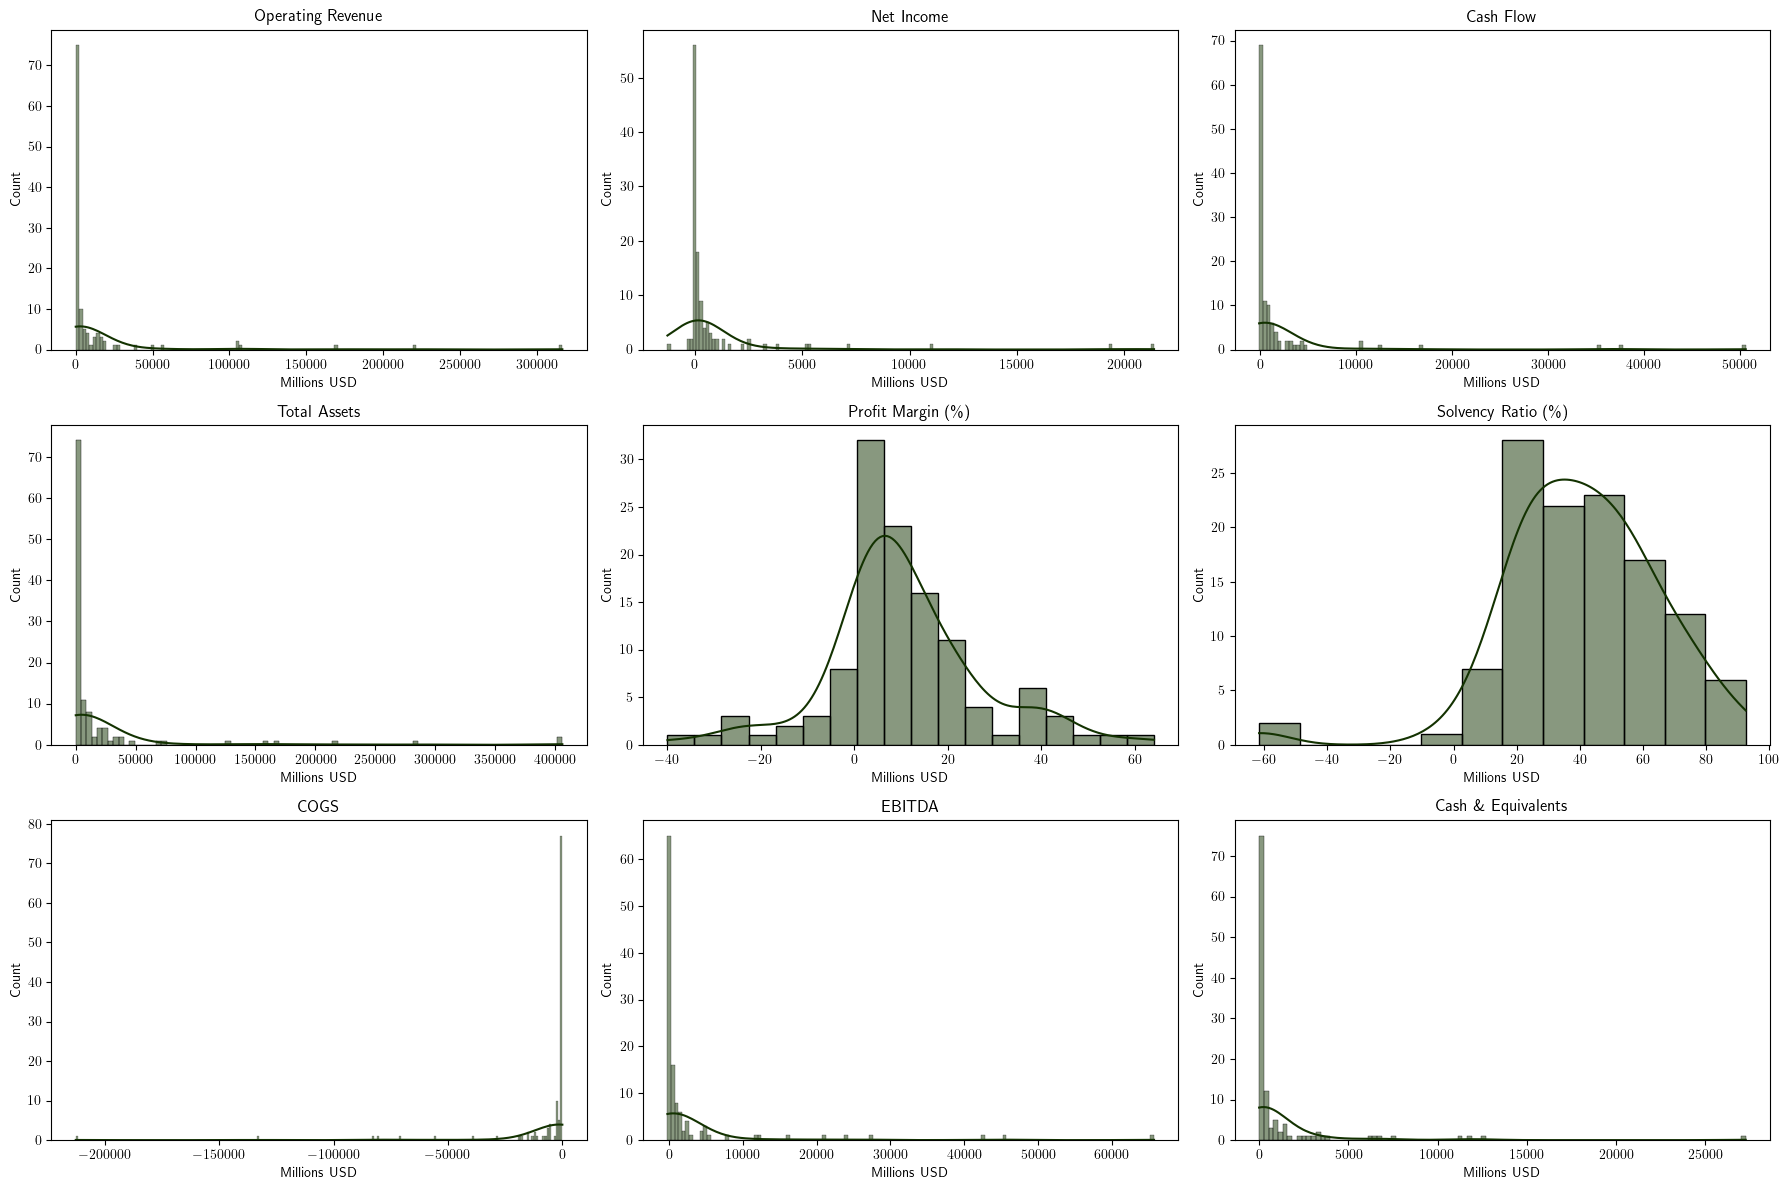

In [5]:
# Filter only the 2023 metrics
numerical_features_2023 = [col for col in data.columns if col in metrics_2023]

num_plots = len(numerical_features_2023)
num_cols = 3  # Adjusting the number of columns to make plots boxier
num_rows = math.ceil(num_plots / num_cols)

# Capitalize the labels correctly
def format_label(label):
    if label == 'ebitda_2023':
        return 'EBITDA'
    elif label == 'cogs_2023':
        return 'COGS'
    if label == 'cash_2023':
        return 'Cash \& Equivalents'
    if label == 'profit_margin_2023':
        return 'Profit Margin (\%)'
    if label == 'solvency_ratio_2023':
        return 'Solvency Ratio (\%)'
    else:
        return ' '.join(word.capitalize() for word in label.replace('_2023', '').split('_'))

plt.figure(figsize=(18, 12))  # Adjusting the figsize to make plots boxier
for i, col in enumerate(numerical_features_2023, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(data[col].dropna(), kde=True, color='#133201')
    plt.title(format_label(col))
    plt.xlabel('Millions USD')
plt.tight_layout()
plt.savefig('reports/images/histograms.pdf', dpi=320)
plt.show()

#### Correlation heatmap:

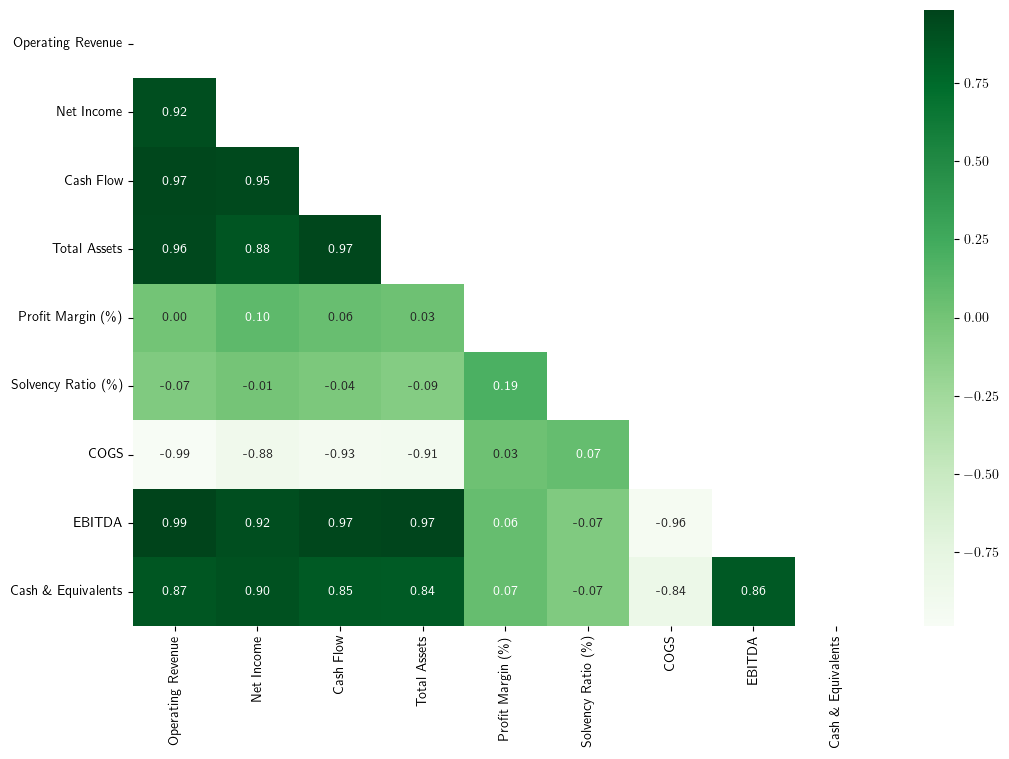

In [6]:
# Apply format_label to the columns
formatted_columns = {col: format_label(col) for col in metrics_2023}

# Rename the columns in the DataFrame
formatted_data = data[metrics_2023].rename(columns=formatted_columns)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(formatted_data.corr(), cmap='Greens', fmt=".2f", annot=True, mask=np.triu(formatted_data.corr()))
plt.savefig('reports/images/heatmap.pdf', dpi=320)
plt.show()

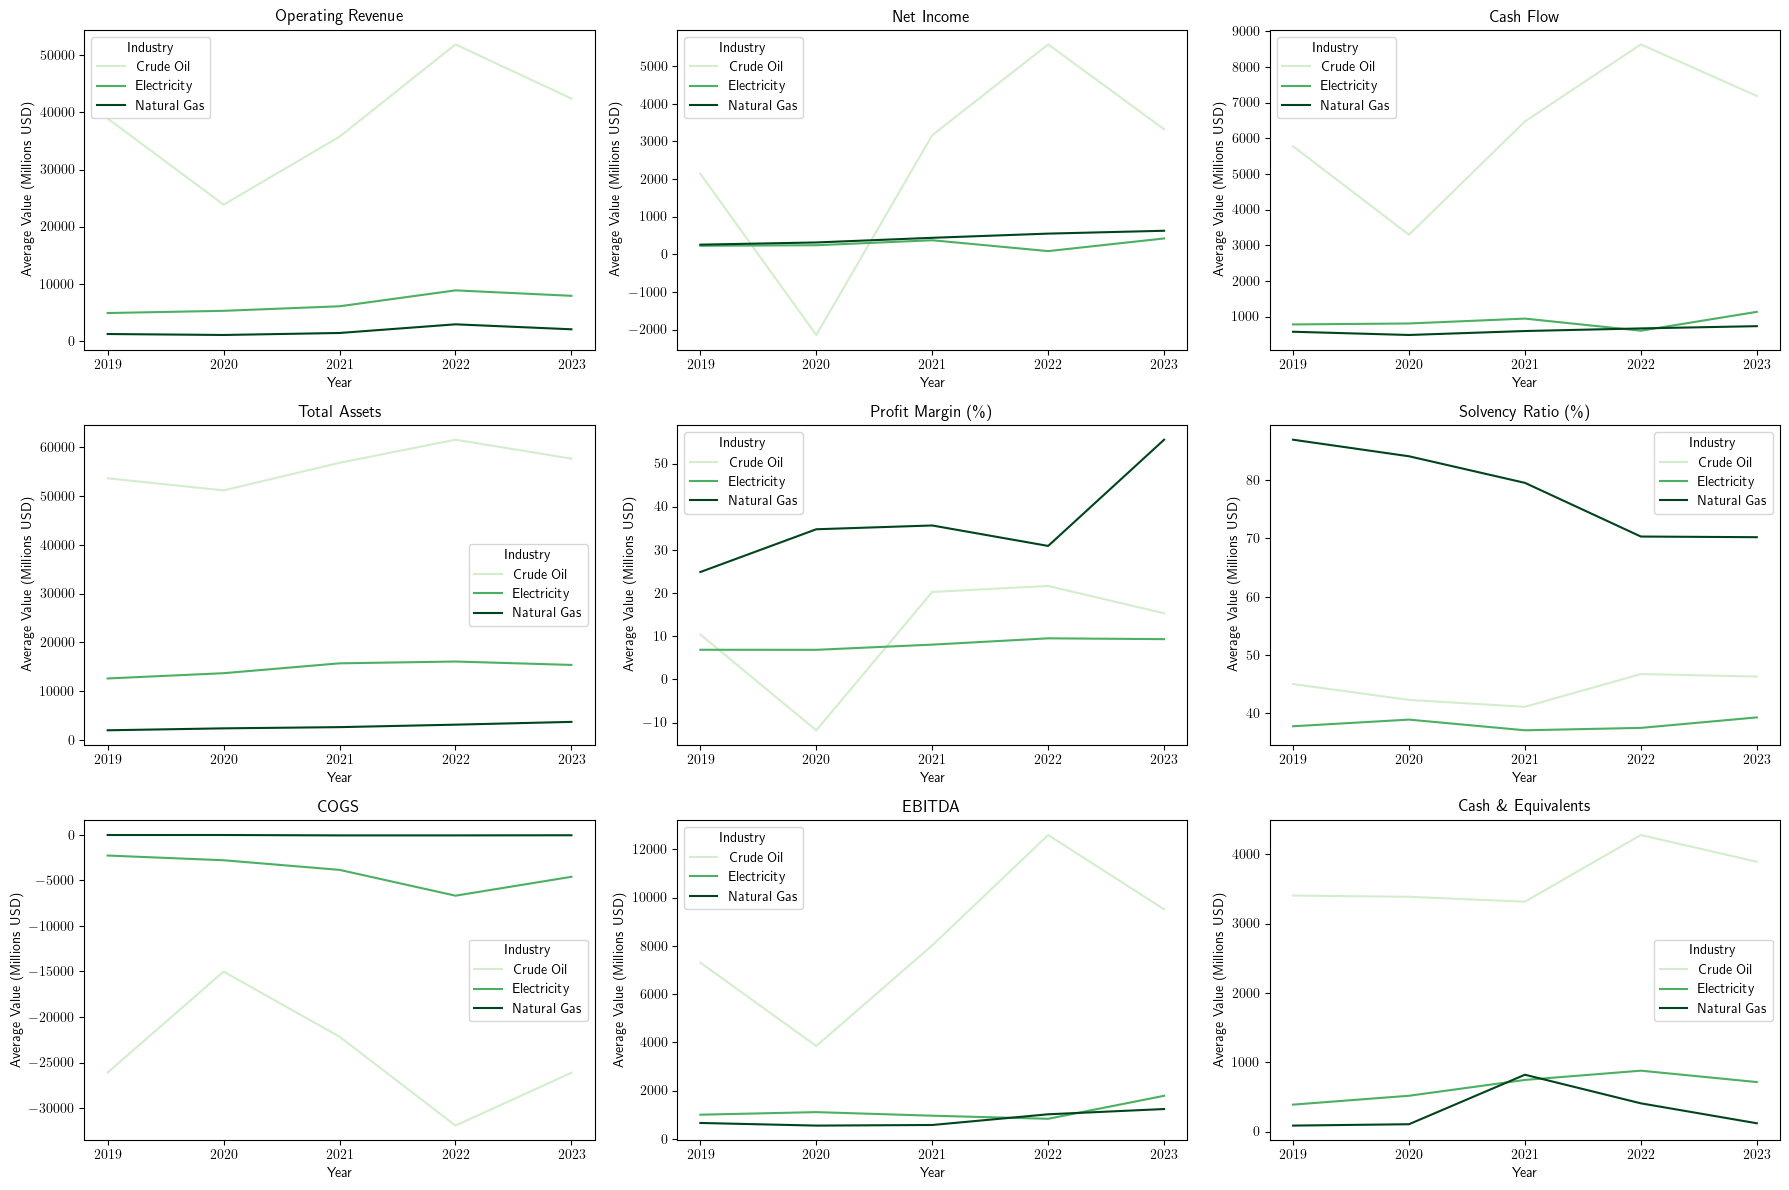

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the metrics and years
metrics = ['operating_revenue', 'net_income', 'cash_flow', 'total_assets', 'profit_margin', 'solvency_ratio', 'cogs', 'ebitda', 'cash']
years = [2023, 2022, 2021, 2020, 2019]

# Capitalize the labels correctly
def format_label(label):
    if label == 'ebitda':
        return 'EBITDA'
    elif label == 'cogs':
        return 'COGS'
    if label == 'cash':
        return 'Cash \& Equivalents'
    if label == 'profit_margin':
        return 'Profit Margin (\%)'
    if label == 'solvency_ratio':
        return 'Solvency Ratio (\%)'
    else:
        return ' '.join(word.capitalize() for word in label.replace('_2023', '').split('_'))
    

# Get the color map
cmap = plt.cm.Greens
colors = [cmap(i) for i in np.linspace(0.2, 1, len(data['industry'].unique()))]

# Create a figure
plt.figure(figsize=(18, 12))

# Loop through the metrics and plot each one
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 3, i)
    for j, industry in enumerate(data['industry'].unique()):
        industry_data = data[data['industry'] == industry]
        averages = [industry_data[f"{metric}_{year}"].mean() for year in years]
        plt.plot(years, averages, label=industry, color=colors[j])
        
    plt.title(format_label(metric))
    plt.xlabel('Year')
    plt.ylabel('Average Value (Millions USD)')
    plt.xticks(years) 
    plt.legend(title='Industry')

plt.tight_layout()
plt.savefig('reports/images/trendlines.pdf', dpi=320)
plt.show()